In [2]:
import numpy as np
import h5py
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation, BatchNormalization
import tensorflow as tf
from tensorflow.keras.optimizers import Adam  # optimizer hyperparameter
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd

In [3]:
def loadAlzeimer(plane):
    if plane == 'coronal':
        print(plane)
        with h5py.File('data/Coronal-Augmented.h5', 'r') as hdf:
            G1 = hdf.get('Train Data')
            trainX = np.array(G1.get('x_train'))
            trainY = np.array(G1.get('y_train'))
            G2 = hdf.get('Test Data')
            testX = np.array(G2.get('x_test'))
            testY = np.array(G2.get('y_test'))

    elif plane == 'sagittal':
        print(plane)
        with h5py.File('data/Sagittal-Augmented.h5', 'r') as hdf:
            G1 = hdf.get('Train Data')
            trainX = np.array(G1.get('x_train'))
            trainY = np.array(G1.get('y_train'))
            G2 = hdf.get('Test Data')
            testX = np.array(G2.get('x_test'))
            testY = np.array(G2.get('y_test'))
    
    else:
        print(plane)
        with h5py.File('data/Axial-Augmented.h5', 'r') as hdf:
            G1 = hdf.get('Train Data')
            trainX = np.array(G1.get('x_train'))
            trainY = np.array(G1.get('y_train'))
            G2 = hdf.get('Test Data')
            testX = np.array(G2.get('x_test'))
            testY = np.array(G2.get('y_test'))
    
    return trainX, trainY, testX, testY


In [29]:
#TODO:
#FIXME: Initialize below before running the other cells. 
modelName = 'CNNScratch'
planeName = 'sagittal' #[can be any of 'sagittal', 'coronal', 'axial']

In [ ]:
#TODO: Fix the model accordingly. 
model = Sequential()

pretrained_model = tf.keras.applications.VGG16(include_top=False,                                                        
                                                        input_shape=(218, 182, 3),
                                                        pooling='avg', classes=4,
                                                        weights='imagenet')
# pretrained_model = tf.keras.applications.ResNet101(include_top=False,                                                        
#                                                         input_shape=(218, 182, 3),
#                                                         pooling='avg', classes=4,
#                                                         weights='imagenet')
# pretrained_model = tf.keras.applications.InceptionV3(include_top=False,                                                        
#                                                         input_shape=(218, 182, 3),
#                                                         pooling='avg', classes=4,
#                                                         weights='imagenet')
# pretrained_model = tf.keras.applications.InceptionResNetV2(include_top=False,                                                        
#                                                         input_shape=(218, 182, 3),
#                                                         pooling='avg', classes=4,
#                                                         weights='imagenet')
# pretrained_model = tf.keras.applications.MobileNet(include_top=False,                                                        
#                                                         input_shape=(218, 182, 3),
#                                                         pooling='avg', classes=4,
#                                                         weights='imagenet')
# pretrained_model = tf.keras.applications.Xception(include_top=False,                                                        
#                                                         input_shape=(218, 182, 3),
#                                                         pooling='avg', classes=4,
#                                                         weights='imagenet')
# pretrained_model = tf.keras.applications.DenseNet121(include_top=False,                                                        
#                                                         input_shape=(218, 182, 3),
#                                                         pooling='avg', classes=4,
#                                                         weights='imagenet')
# pretrained_model = tf.keras.applications.EfficientNetB0(include_top=False,                                                        
#                                                         input_shape=(218, 182, 3),
#                                                         pooling='avg', classes=4,
#                                                         weights='imagenet')
# pretrained_model = tf.keras.applications.NASNetLarge(include_top=False,                                                        
#                                                         input_shape=(218, 182, 3),
#                                                         pooling='avg', classes=4,
#                                                         weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False

model.add(pretrained_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
#model.summary()


In [30]:
x_train, y_train, x_test, y_test = loadAlzeimer(planeName)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

sagittal
(9699, 218, 182, 1) (9699,) (4157, 218, 182, 1) (4157,)


In [ ]:
# Dataset ready for deep learning
#x_train = np.expand_dims(x_train, axis=-1)
x_train = np.repeat(x_train, 3, axis=3)

#x_test = np.expand_dims(x_test, axis=-1)
x_test = np.repeat(x_test, 3, axis=3)

y_train_cat = to_categorical(y_train, num_classes=4)
y_test_cat = to_categorical(y_test, num_classes=4)

# print("Test", x_test.shape)
# print("Train", x_train.shape)
# print(y_train.shape)
# print(y_train_cat.shape)
# print(y_test_cat.shape)
# # print(np.max(x_train[0])) #to ensure that the values are within the range [0,1]


In [31]:
#Run this code only for CNN Scratch

from tensorflow.keras.utils import to_categorical
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
y_train_cat = to_categorical(y_train, num_classes=4)
y_test_cat = to_categorical(y_test, num_classes=4)
print('X train shape', x_train.shape)
print('Y train shape', y_train_cat.shape)
row = x_train.shape[1]
col = x_train.shape[2]
print(row, col)

X train shape (9699, 218, 182, 1, 1)
Y train shape (9699, 4)
218 182


In [32]:
#code for CNN Scratch model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(row,col,1), activation='relu'))
model.add(Conv2D(16, (3, 3), activation='relu'))

#model.add(Conv2D(16, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(16, (1,1)))

model.add(Flatten())

model.add(Dense(4, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics =['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 216, 180, 16)      160       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 214, 178, 16)      2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 107, 89, 16)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 105, 87, 32)       4640      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 103, 85, 32)       9248      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 101, 83, 32)       9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 41, 32)       

In [33]:
METRIC = tf.keras.metrics.AUC(name='acc')
# learning rate hyperparameter.
model.compile(optimizer=Adam(learning_rate=0.0001),
                     loss='categorical_crossentropy', metrics=METRIC)


In [34]:

filepath = 'weights/' + modelName + '_' + planeName + '.hdf5'

earlystopping = EarlyStopping(monitor='acc',
                              mode='max',
                              patience=15,
                              verbose=1)

checkpoint = ModelCheckpoint(filepath,
                             monitor='acc',
                             mode='max',
                             save_best_only=True,
                             verbose=1)
callback_list = [earlystopping, checkpoint]


In [35]:
# training
# batch_size hyperparamter.
history = model.fit(x_train, y_train_cat, batch_size=128, epochs=100,
                           verbose=2, validation_data=(x_test, y_test_cat), callbacks=callback_list)


Epoch 1/100
76/76 - 15s - loss: 1.3903 - acc: 0.6546 - val_loss: 1.1036 - val_acc: 0.7772

Epoch 00001: acc improved from -inf to 0.65463, saving model to weights\CNNScratch_sagittal.hdf5
Epoch 2/100
76/76 - 11s - loss: 0.9659 - acc: 0.8365 - val_loss: 0.9102 - val_acc: 0.8544

Epoch 00002: acc improved from 0.65463 to 0.83655, saving model to weights\CNNScratch_sagittal.hdf5
Epoch 3/100
76/76 - 11s - loss: 0.7710 - acc: 0.9001 - val_loss: 0.7488 - val_acc: 0.9048

Epoch 00003: acc improved from 0.83655 to 0.90007, saving model to weights\CNNScratch_sagittal.hdf5
Epoch 4/100
76/76 - 11s - loss: 0.6448 - acc: 0.9300 - val_loss: 0.6606 - val_acc: 0.9258

Epoch 00004: acc improved from 0.90007 to 0.92999, saving model to weights\CNNScratch_sagittal.hdf5
Epoch 5/100
76/76 - 11s - loss: 0.5381 - acc: 0.9511 - val_loss: 0.5789 - val_acc: 0.9425

Epoch 00005: acc improved from 0.92999 to 0.95115, saving model to weights\CNNScratch_sagittal.hdf5
Epoch 6/100
76/76 - 11s - loss: 0.4432 - acc: 0.

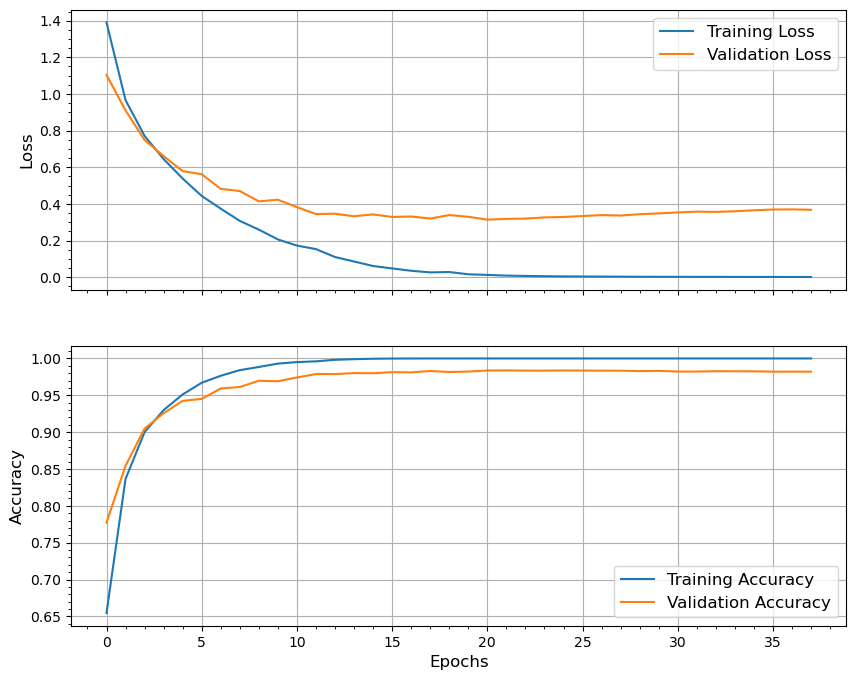

In [36]:
df = pd.DataFrame(history.history)
df.head()
# losses[['acc','val_acc']].plot()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1,sharex=True, figsize=(10,8))
ax[0].plot(df['loss'],label = 'Training Loss')
ax[0].plot(df['val_loss'],label = 'Validation Loss')
ax[1].plot(df['acc'],label = 'Training Accuracy')
ax[1].plot(df['val_acc'],label = 'Validation Accuracy')
ax[0].legend(loc='best',prop={'size':12})
ax[1].legend(loc='best',prop={'size':12})
ax[0].minorticks_on()
ax[1].minorticks_on()
ax[1].set_xlabel('Epochs', fontsize=12)
ax[1].set_ylabel('Accuracy', fontsize=12)
ax[0].set_ylabel('Loss', fontsize=12)
ax[0].grid()
ax[1].grid()
plt.draw()
plt.savefig('resultsheets/' + modelName + '_' + planeName + '.pdf')

#saving the results
#filename = 
df.to_csv('resultsheets/' + modelName + '_' + planeName + '.csv')

In [1]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#%%
prediction = model.predict_classes(x_test)
mcm = multilabel_confusion_matrix(y_true=y_test, y_pred=prediction, labels=[0,1,2,3], samplewise=False)
tn = mcm[:,0,0]
tp = mcm[:,1,1]
fp = mcm[:,0,1]
fn = mcm[:,1,0]
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)

#%%
# use model to predict probability that given y value is 1
y_pred_proba = model.predict_proba(x_test)

Specificity = np.mean(specificity)
Sensitivity = np.mean(sensitivity)
FNR = 1-np.mean(sensitivity)
FPR = 1-np.mean(specificity)
Acc = metrics.accuracy_score(y_test,prediction)
auc = metrics.roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

print("Specificity or TNR", np.mean(specificity))
print("Sensitivity or TPR or Recall", np.mean(sensitivity))
print("FNR ", 1-np.mean(sensitivity))
print("FPR", 1-np.mean(specificity))
print("Accuracy = ", metrics.accuracy_score(y_test, prediction))
print("AUC =",auc)


metrics = {'Accuracy':[Acc],
           'Specificity':[Specificity],
           'Sensitivity':[Sensitivity],
           'FNR':[FNR],
           'FPR':[FPR],
           'AUC':[auc]}
df = pd.DataFrame(metrics)
print (df)
df.to_csv('metrics/' + modelName + '_' + planeName + '.csv')

cf_matrix = confusion_matrix(y_test, prediction)
fig = plt.figure(figsize=(7, 6))
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, linewidth=0.5,linecolor="black",fmt='')
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
plt.draw()
plt.savefig('cm/' + modelName + '_' + planeName + '.pdf')


NameError: name 'model' is not defined

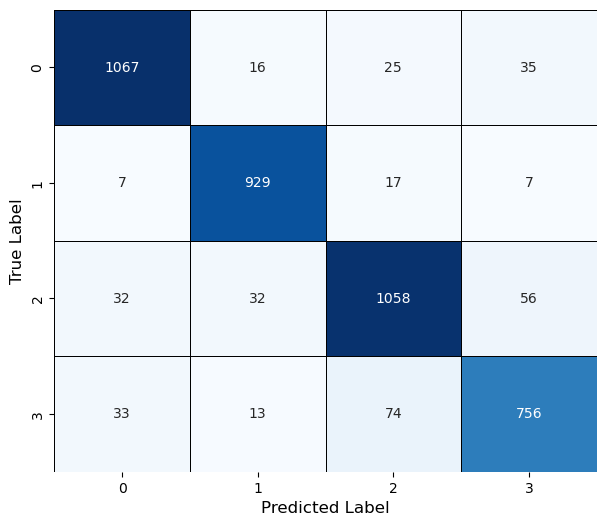

In [38]:
cf_matrix = confusion_matrix(y_test, prediction)
fig = plt.figure(figsize=(7, 6))
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, linewidth=0.5,linecolor="black",fmt='')
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
plt.draw()
plt.savefig('cm/' + modelName + '_' + planeName + '.pdf')

In [26]:
df.to_csv('metrics/' + modelName + '_' + planeName + '.csv')